<img src="https://imgur.com/3U3hI1u.png" width="100%" />

#### Boas vindas a sua segunda e última tarefa de Aprendizado por Reforço!

Neste exercício, você deverá implementar e comparar diferentes algoritmos de **Aprendizado por Reforço Profundo** utilizando a biblioteca _[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)_.

A _Stable Baselines_ é uma biblioteca de Aprendizado por Reforço que implementa diversos algoritmos de agentes, além de várias funcionalidades úteis para seu treinamento. Suas implementações são bem simples e intuitivas, mas sem deixarem de ser otimizadas e poderosas, buscando facilitar o desenvolvimento de projetos de reforço de alta qualidade.

Antes de começar a tarefa, é importante acessar e se familiarizar com o tutorial da biblioteca disponível neste repositório! Depois de rodar o guia, você já estará capaz de completar este trabalho.

## Escolha do Ambiente

Antes de analisar o possíveis algoritmos, o primeiro passo é escolher qual ambiente você quer resolver! Para esta tarefa, separamos quatro possíveis ambientes diferentes, em ordem de dificuldade, que você poderá escolher: **Pong**, **Lunar Lander** e **Lunar Lander Continuous**. Lembrando que, quanto mais difícil um ambiente, mais demorado será o treinamento.

A seguir, estão as descrições de cada um deles:

<h2 align="center">Pong</h2>
<img src="https://imgur.com/vdVCmvo.gif" width=50% />

**Pong** é o ambiente de Aprendizado por Reforço criado pelo Turing que simula o jogo de *Pong*, no qual existem duas "raquetes" e uma bola, e o objetivo de cada uma das raquetes é não somente evitar que a bola passe por ela, como também fazer com que esta passe pela linha que a outra raquete protege.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 2 informações.

| Estado    | Informação                            |
| :-------- | :------------------------------------ |
| 0         | Distância _x_ entre a bola e o agente |
| 1         | Distância _y_ entre a bola e o agente |

Já o **Espaço de Ação** é composto por três ações: mover o jogador para cima, baixo, ou deixá-lo parado.

| Ação | Significado      |
| :--- | :--------------- |
| 0    | Ficar parado     |
| 1    | Mover para baixo |
| 2    | Mover para cima  |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência          | Recompensa |
| :------------------ | ---------: |
| Ponto do Agente     | $+500$     |
| Ponto do Oponente   | $-500$     |
| Vitória do Agente   | $+2000$    |
| Vitória do Oponente | $-2000$    |

O primeiro jogador a fazer quatro pontos ganha o jogo. Além disso, as recompensas são cumulativas. Isso significa que se o oponente fizer um ponto _e_ ganhar o jogo, a recompensa é de $-2500$.

### Instalação

Para instalar os ambientes criados pelo Turing, basta rodar o seguinte comando no notebook (se preferir, também pode rodar no terminal; é só tirar o ponto de exclamação do começo da linha):

In [3]:
%pip install --upgrade gym==0.19.0
%pip install -U turing-envs

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Home

Com o ambiente do Turing instalado, podemos testar um modelo! Para isso, vamos precisar de 2 bibliotecas: **gym** (para inicialização dos ambientes) e **stable_baselines3** (para inicialização e avaliação dos modelos):

In [4]:
import gym 
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

# Definindo ambiente
env = gym.make("turing_envs:pong-normal-v0")

# Definindo modelo
model = PPO("MlpPolicy", env, seed=1, verbose=1)

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Recompensa Média: -3900.00 +/- 200.0


<h2 align="center">Lunar Lander</h2>

<img src="https://raw.githubusercontent.com/fakemonk1/Reinforcement-Learning-Lunar_Lander/master/images/3.gif" width=50% />

**Lunar Lander** é um ambiente do Gym que simula o pouso de um módulo lunar na Lua. O agente deve controlar os três motores do módulo para guiá-lo até a pista de pouso, sem gastar muita energia.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 8 informações.

| Estado    | Informação                                     |
| :-------- | :--------------------------------------------- |
| 0         | Posição no eixo _x_ do módulo                  |
| 1         | Posição no eixo _y_ do módulo                  |
| 2         | Velocidade no eixo _x_ do módulo               |
| 3         | Velocidade no eixo _y_ do módulo               |
| 4         | Ângulo do módulo                               |
| 5         | Velocidade angular do módulo                   |
| 6         | Se a perna esquerda está em contato com o chão |
| 7         | Se a perna direita está em contato com o chão  |

Já o **Espaço de Ação** é composto por quatro ações: não fazer nada, acionar o motor esquerdo, acionar o motor principal ou acionar o motor direito.

| Ação | Significado             |
| :--- | :---------------------- |
| 0    | Não fazer nada          |
| 1    | Acionar motor esquerdo  |
| 2    | Acionar motor principal |
| 3    | Acionar motor direito   |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência              | Recompensa       |
| :---------------------- | ---------------: |
| Se aproximar da pista   | Até $+140$       |
| Pousar                  | $+100$           |
| Colidir                 | $-100$           |
| Tocar uma perna no chão | $+10$            |
| Acionar motor principal | $-0.3$ por frame |

#### Lunar Lander Continuous

Também existe uma versão contínua do ambiente do Lunar Lander, no qual podemos controlar a força que cada um dos motores do módulo exercerá. Nesse caso, teremos duas ações:

| Ação | Intervalo  | Significado                          |
| :--- | :--------: | :----------------------------------- |
| 0    | $-1$ a $+1$ | Força do motor principal             |
| 1    | $-1$ a $+1$ | Força dos motores esquerdo e direito |

Na versão contínua, os algoritmos que poderemos usar serão diferentes, e o treinamento provavlmente será mais difícil.

### Instalação

Para instalar os ambientes do Gym que usam a engine Box2D, é necessário rodar os seguintes comandos numa célula do notebook (se preferir, também pode rodar no terminal; é só tirar o ponto de exclamação do começo da linha):


**Windows**

In [5]:
# !conda install swig
# !pip install box2d box2d-kengz

**Linux**

In [6]:
# !apt install swig
# !pip install -u 'gym[box2d]'

**MacOS**

In [7]:
!brew install swig
%pip install pyglet==1.5.11
%pip install -U 'gym[Box_2D]'

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
No changes to formulae.

To reinstall 4.0.2, run:
  brew reinstall swig
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core

Em seguida, para criar o ambiente, roda-se a linha de código a seguir:

In [8]:
# env = gym.make("LunarLander-v2")

ou

In [9]:
# env = gym.make("LunarLanderContinuous-v2")

### Exercício 1 - Testando Modelos

Caro piloto, agora que você conhece esses dois ambientes, é hora de brincar com eles. Você deverá testar diferentes algoritmos (a seu critério), e ver sua recompensa média. Para ver quais as limitações dos modelos, veja esse [link](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html). Abaixo, criamos uma função que será útil para comparar os modelos posteriormente.

In [10]:
def getValues(model, env, n_episodes, info_dict):
    model_name = str(model.__class__).split(".")[-1][:-2]

    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    info_dict[model_name] = {}
    info_dict[model_name]["mean_reward"] = mean_reward
    info_dict[model_name]["std_reward"] = std_reward
    
    return info_dict

algorithms_dict = {}

#### Treinando e Avaliando seu próprio modelo

Primeiramente, agora você deve decidir em qual ambiente você deseja treinar seu agente. Para isto, basta tirar o comentário da linha referente ao ambiente escolhido:

In [11]:
env_name = "turing_envs:pong-normal-v0"
# env_name = "LunarLander-v2"
# env_name = "LunarLanderContinuous-v2"

Em seguida, você está livre para testar diferentes algoritmos para seu ambiente!

In [12]:
import os

# Cria um diretório de logs
log_dirPPO = "./logsPPO/"
os.makedirs(log_dirPPO, exist_ok=True)

In [13]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3
from stable_baselines3.common.monitor import Monitor

# Definindo o ambiente
env = gym.make(env_name)

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dirPPO)

model = PPO("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps=100000) # Treine o modelo
n_episodes = 25 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

env.close()

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 560      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 608         |
|    ep_rew_mean          | -3.92e+03   |
| time/                   |             |
|    fps                  | 553         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005816877 |
|    clip_fraction        | 0.027       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_varia

In [14]:
# Cria um diretório de logs
log_dirA2C = "./logsA2C/"
os.makedirs(log_dirA2C, exist_ok=True)

In [15]:
### Espaço livre para testagem de diferentes algoritmos
from stable_baselines3 import A2C # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dirA2C)

model = A2C("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps=100000) # Treine o modelo
n_episodes = 25 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

env.close()

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 451      |
|    ep_rew_mean        | -4e+03   |
| time/                 |          |
|    fps                | 203      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.09    |
|    explained_variance | -33.6    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.137    |
|    value_loss         | 0.0275   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 451      |
|    ep_rew_mean        | -4e+03   |
| time/                 |          |
|    fps                | 181      |
|    iterations         | 200      |
|    time_elapsed       | 5        |
|    total_timesteps   

In [16]:
# Cria um diretório de logs
log_dirDQN = "./logsDQN/"
os.makedirs(log_dirDQN, exist_ok=True)

In [17]:
from stable_baselines3 import DQN # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dirDQN)

model = DQN("MlpPolicy", env, seed=1, verbose=1) # Defina o modelo
model.learn(total_timesteps=100000) # Treine o modelo
n_episodes = 25 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

env.close()

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 581      |
|    ep_rew_mean      | -4e+03   |
|    exploration_rate | 0.779    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1791     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2324     |
----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 699       |
|    ep_rew_mean      | -2.88e+03 |
|    exploration_rate | 0.469     |
| time/               |           |
|    episodes         | 8         |
|    fps              | 1766      |
|    time_elapsed     | 3         |
|    total_timesteps  | 5592      |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 673       |
|    ep_rew_mean      | -3.21e+03 |
|    exploration_rate |

A seguir, detalhe um pouco mais quais foram os algoritmos testados bem como a performance obtida por cada um.

Este detalhamento pode ser feito por meio de um ou mais gráficos mostrando o desempenho dos modelos, ou simplesmente por texto.

In [18]:
print("Recompensa dos algoritmos: ", 
    "\n\tPPO: ", algorithms_dict["PPO"]['mean_reward'], "+/-", algorithms_dict['PPO']['std_reward'],
    "\n\tA2C: ", algorithms_dict["A2C"]['mean_reward'], "+/-", algorithms_dict['A2C']['std_reward'],
    "\n\tDQN: ", algorithms_dict["DQN"]['mean_reward'], "+/-", algorithms_dict['DQN']['std_reward'])

Recompensa dos algoritmos:  
	PPO:  4000.0 +/- 0.0 
	A2C:  -3720.0 +/- 285.657137141714 
	DQN:  -3480.0 +/- 1352.6270735128733


Podemos perceber que o PPO obteve resultados absurdamente melhores que os outros algoritmos testados

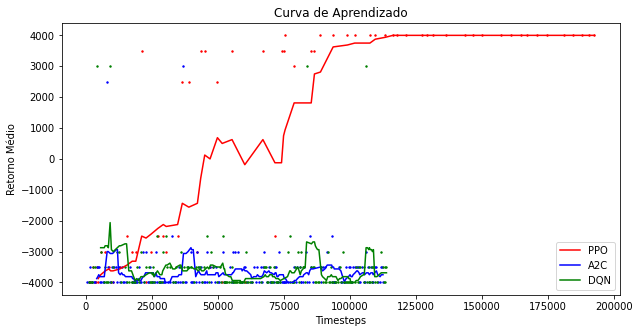

In [19]:
import matplotlib.pyplot as plt
from stable_baselines3.common import results_plotter

window=8

# Obtém os resultados
resultsPPO = results_plotter.load_results(log_dirPPO)
xPPO, yPPO = results_plotter.ts2xy(resultsPPO, "timesteps")
resultsA2C = results_plotter.load_results(log_dirA2C)
xA2C, yA2C = results_plotter.ts2xy(resultsA2C, "timesteps")
resultsDQN = results_plotter.load_results(log_dirDQN)
xDQN, yDQN = results_plotter.ts2xy(resultsDQN, "timesteps")

# Calcula a média móvel do retorno
y_smoothedPPO = results_plotter.rolling_window(yPPO, window=window).mean(axis=1)
y_smoothedA2C = results_plotter.rolling_window(yA2C, window=window).mean(axis=1)
y_smoothedDQN = results_plotter.rolling_window(yDQN, window=window).mean(axis=1)

# Plota os resultados
fig = plt.figure("Curva de Aprendizado", figsize=(10, 5))

plt.scatter(xPPO, yPPO, s=2, color="red")
plt.scatter(xA2C, yA2C, s=2, color="blue")
plt.scatter(xDQN, yDQN, s=2, color="green")

plt.plot(xPPO[window-1:], y_smoothedPPO, color="red", label="PPO")
plt.plot(xA2C[window-1:], y_smoothedA2C, color="blue", label="A2C")
plt.plot(xDQN[window-1:], y_smoothedDQN, color="green", label="DQN")

plt.xlabel("Timesteps")
plt.ylabel("Retorno Médio")
plt.title("Curva de Aprendizado")
plt.legend()
plt.show()

O PPO foi o único algoritmo que melhorou sua recompensa ao longo do tempo, já que os outros dois oscilaram muito e permaneceram abaixo de 0.

### Escolha do Algoritmo

Após testar e analisar diversos algoritmos diferentes, qual foi o escolhido?

_Pergunta Extra:_ você usou algum critério para escolher quais algoritmos seriam testados?

In [20]:

### Qual foi o algoritmo escolhido?

O algoritmo escolhido foi o PPO, pelos motivos mostrados na análise acima

### Exercício 2 - Mudança de Hiperparâmetros

No segundo exercício, você deve testar diferentes hiperparâmetros para seu modelo escolhido!

Todos os modelos da Stable Baselines têm diversos parâmetros detalhados em sua documentação ([exemplo: PPO](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters)) que podem ser modificados para alterar o modelo.

Para modificar os parâmetros de um algoritmo, tal como o ```PPO(...)```, basta especificá-los durante a construção do modelo, da seguinte forma:

In [22]:
model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0007, gamma=0.9) # Especificando diferentes valores para a learning_rate e para o gamma

Using cpu device
Wrapping the env in a DummyVecEnv.


Se quiser, você também pode alterar a arquitetura das redes neurais do modelo, da seguinte forma:

In [23]:
import torch
import inspect

# Parâmetros das redes neurais
policy_kwargs = dict(activation_fn=torch.nn.ReLU,                # Troca a função de ativação para ReLU
                     net_arch=[dict(pi=[32, 32], vf=[32, 32])])  # Define a arquitetura das redes do Actor-Critic

# Cria o nosso modelo com os novos parâmetros
model = PPO("MlpPolicy", env, seed=1, verbose=1, 
            policy_kwargs=policy_kwargs) # Especificando outra arquitetura de rede

Using cpu device
Wrapping the env in a DummyVecEnv.


Caso queira ler um pouco mais sobre essas diferentes arquiteturas, recomendamos [a seguinte página da documentação da biblioteca.](https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html)

A seguir, preparamos uma outra função útil para guardar os parâmetros testados:

In [24]:
def getValuesAndParams(model, env, n_episodes, info_dict):
    
    model_name = model.__class__.__name__
    env_name = env.unwrapped.__class__.__name__
    
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    args = inspect.getfullargspec(model.__class__).args
    func_params_dict = {}
    for arg in args:
        p = model.__dict__.get(arg)
        if type(p) in [None, int, float, str, dict]:
            func_params_dict[arg] = p
    
    
    if model_name not in info_dict:
        info_dict[model_name] = {}
        
    if "env" not in info_dict[model_name]:
        info_dict[model_name]["env"] = []
        
    info_dict[model_name]["env"].append(env_name)
        
    if "mean_reward" not in info_dict[model_name]:
        info_dict[model_name]["mean_reward"] = []
        info_dict[model_name]["std_reward"] = []
        
    if "class_args" not in info_dict[model_name]:
        info_dict[model_name]["class_args"] = []
        
    info_dict[model_name]["mean_reward"].append(mean_reward)
    info_dict[model_name]["std_reward"].append(std_reward)
    info_dict[model_name]["class_args"].append(func_params_dict)
    
    params_dict = model.get_parameters()
    if "policy.optimizer" not in params_dict:
        if "actor.optimizer" not in info_dict[model_name]:
            info_dict[model_name]["actor.optimizer"] = []
            info_dict[model_name]["critic.optimizer"] = []

        info_dict[model_name]["actor.optimizer"] += params_dict["actor.optimizer"]["param_groups"]
        info_dict[model_name]["critic.optimizer"] += params_dict["critic.optimizer"]["param_groups"]
    
    else:
        if "policy.optimizer" not in info_dict[model_name]:
            info_dict[model_name]["policy.optimizer"] = []
    
        info_dict[model_name]["policy.optimizer"] += params_dict["policy.optimizer"]["param_groups"]
    
    return info_dict

parameters_dict = {}

A seguir, você está livre para testar diferentes hiperparâmetros para o algoritmo escolhido! Você deve testar valores diversos para pelo menos **dois** parâmetros. Se quiser algumas sugestões, recomendamos realizar testes no `gamma`, na `learning_rate` ou na arquitetura da rede neural do modelo.

In [25]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0007, gamma=0.9) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

/usr/local/lib/python3.9/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 262      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 614         |
|    ep_rew_mean          | -3.92e+03   |
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005792721 |
|    clip_fraction        | 0.0574      |
|    clip_range           | 0.2         |
|    entropy_loss   

/usr/local/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [26]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0007, gamma=0.5) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 566      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 694         |
|    ep_rew_mean          | -3.88e+03   |
| time/                   |             |
|    fps                  | 382         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007053756 |
|    clip_fraction        | 0.0387      |
|    clip_range           | 0.2         |
|    entropy_loss   

In [27]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0001, gamma=0.6) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 592      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 788          |
|    ep_rew_mean          | -3.9e+03     |
| time/                   |              |
|    fps                  | 465          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0004410908 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    en

In [28]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0001, gamma=0.99) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 474      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 657         |
|    ep_rew_mean          | -3.83e+03   |
| time/                   |             |
|    fps                  | 274         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.002046329 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss   

In [29]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.001, gamma=0.8) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 653      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 715         |
|    ep_rew_mean          | -3.9e+03    |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005838006 |
|    clip_fraction        | 0.0653      |
|    clip_range           | 0.2         |
|    entropy_loss   

In [58]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0015, gamma=0.97) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 973      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 614         |
|    ep_rew_mean          | -3.92e+03   |
| time/                   |             |
|    fps                  | 801         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009175637 |
|    clip_fraction        | 0.0936      |
|    clip_range           | 0.2         |
|    entropy_loss   

/usr/local/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [31]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0018, gamma=0.99) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 597      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 635         |
|    ep_rew_mean          | -3.92e+03   |
| time/                   |             |
|    fps                  | 467         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010348436 |
|    clip_fraction        | 0.114       |
|    clip_range           | 0.2         |
|    entropy_loss   

In [32]:
# Definindo o ambiente
env = gym.make(env_name)

model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0003, gamma=0.8) # Especificando diferentes valores para a learning_rate e para o gamma # Defina o modelo
model.learn(total_timesteps= 80000) # Treine o modelo
n_episodes = 20 # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -4e+03   |
| time/              |          |
|    fps             | 374      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 676          |
|    ep_rew_mean          | -3.83e+03    |
| time/                   |              |
|    fps                  | 314          |
|    iterations           | 2            |
|    time_elapsed         | 13           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0064860573 |
|    clip_fraction        | 0.0223       |
|    clip_range           | 0.2          |
|    en

In [56]:
print("Recompensa dos algoritmos: ")

for n in range(len(parameters_dict["PPO"]['mean_reward'])):
    print("\tPara learning_rate de ", parameters_dict["PPO"]['class_args'][n]['learning_rate'],
     "e gamma de", parameters_dict["PPO"]['class_args'][n]['gamma'])
    print("\t\t", parameters_dict["PPO"]['mean_reward'][n], "+/-", parameters_dict["PPO"]['std_reward'][n])

indice_maior = parameters_dict["PPO"]['mean_reward'].index(max(parameters_dict["PPO"]['mean_reward']))

print("Melhor recompensa: ", parameters_dict["PPO"]['mean_reward'][indice_maior], "+/-", parameters_dict['PPO']['std_reward'][indice_maior], 
"(com gamma=", parameters_dict["PPO"]['class_args'][indice_maior]['gamma'], " e learning_rate=", parameters_dict["PPO"]['class_args'][indice_maior]['learning_rate'], ")")

Recompensa dos algoritmos: 
	Para learning_rate de  0.0007 e gamma de 0.9
		 3725.0 +/- 828.7792227125389
	Para learning_rate de  0.0007 e gamma de 0.5
		 -3725.0 +/- 334.4772040064913
	Para learning_rate de  0.0001 e gamma de 0.6
		 -2000.0 +/- 2544.6021299998947
	Para learning_rate de  0.0001 e gamma de 0.99
		 -1125.0 +/- 2914.939965076468
	Para learning_rate de  0.001 e gamma de 0.8
		 -2725.0 +/- 2052.2853115490548
	Para learning_rate de  0.0015 e gamma de 0.97
		 3875.0 +/- 544.8623679425842
	Para learning_rate de  0.0018 e gamma de 0.99
		 1050.0 +/- 1967.8668654154426
	Para learning_rate de  0.0003 e gamma de 0.8
		 -3025.0 +/- 1893.904696651867
Melhor recompensa:  3875.0 +/- 544.8623679425842 (com gamma= 0.97  e learning_rate= 0.0015 )
